<a href="https://colab.research.google.com/github/EstebanPerez25/ACD-Modelo_predictivo_de_satisfacion/blob/TipoDeOsf/Modelo_predictivo_de_satisfacci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODELO PREDICTIVO DE SATISFACCIÓN DE PROYECTO SOLIDARIO

Modelo clasificador que puede predecir el grado de satisfacción de estudiantes del Tecnológico de Monterrey en su experiencia realizando un proyecto solidario con una organización socio formadora.



Por: Esteban Pérez. A00832329. Instituto Tecnológico y de Estudios Superiores de Monterrey. (Junio, 2023)



## I. COMPRENSIÓN DEL NEGOCIO
---

## II. COMPRENSIÓN DE LOS DATOS
---

### Descripción de variables

44 columnas:

* `periodoA`: Periodo académico
* `fechaInicio`: Fecha de inicio
* `fechaFin`: Fecha final
* `tipoRespuesta`: Tipo de respuesta
* `ip`: Dirección IP
* `progreso`: Progreso
* `duracion`: Duración (en segundos)
* `finalizado`: Finalizado
* `fechaRegistrada`: Fecha registrada
* `idRespuesta`: ID de respuesta
* `apellidoDest`: Apellido del destinatario
* `id`: ID
* `datRefExt`: Datos de referencia externos
* `latitud`: Latitud de ubicación
* `longitud`: Longitud de ubicación
* `canalDist`: Canal de la distribución
* `idioma`: Idioma del usuario
* `p1_a`: 1. Evalúa tu nivel satisfacción en los siguientes aspectos: - a) Al concluir este Proyecto Solidario.
* `p1_b`: 1. Evalúa tu nivel satisfacción en los siguientes aspectos: - b) Vivir la experiencia de aprendizaje relacionada con un Objetivo de Desarrollo Sostenible.
* `p1_c`: 1. Evalúa tu nivel satisfacción en los siguientes aspectos: - c) Nivel de valor aportado a la organización socio formadora a través de tus entregables
* `p1_e`: 1. Evalúa tu nivel satisfacción en los siguientes aspectos: - e) Momentos de interacción y escucha con los beneficiarios/destinatarios del proyecto
* `p1_f`: 1. Evalúa tu nivel satisfacción en los siguientes aspectos: - f)  Herramientas que aplicaste como las actividades, reportes, "quizzes", dentro de la plataforma de CANVAS en el desarrollo de la experiencia de Servicio Social.
* `p1_g`: 1. Evalúa tu nivel satisfacción en los siguientes aspectos: - g) Experiencia de colaboración con la organización socio formadora
* `p1_h`: 1. Evalúa tu nivel satisfacción en los siguientes aspectos: - h) Seguimiento y liderazgo de la organización socio formadora
* `p1_i`: 1. Evalúa tu nivel satisfacción en los siguientes aspectos: - i) Atención y servicio del área que administra el Servicio Social en el campus (asesoría y orientación, información puntual, atención de dudas, seguimiento de incidentes)
* `p2`: 2. La Organización Socio Formadora ¿ofreció retroalimentación sobre el desarrollo del Proyecto Solidario y tu desempeño?
* `p3`: 3. ¿Consideras interesante la causa social del socio formador?
* `p4`: 4. Escribe algún comentario que te interese compartir con la organización socio formadora:
* `p5_a`: 5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - a) Ser sensible ante la vulnerabilidad, el dolor y el sufrimiento del otro y actuar con el fin de eliminarlo, aliviarlo o evitarlo, a través de acciones justas alejadas de la pasión egoísta y/o de sentimientos de superioridad
* `p5_b`: 5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - b) Actuar con responsabilidad, con el fin de asegurar el bienestar de la colectividad, a través de acciones que garantizan el acceso a los derechos humanos, el empoderamiento de los ciudadanos y de las comunidades, así como el cuidado, mantenimiento y uso sostenible de los recursos y bienes comunes
* `p5_c`: 5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - c) Actuar con respeto ante la diversidad de género, sexual, étnica, cultural, de capacidades, generacional, religiosa y socioeconómica mostrando una cordial aceptación de las diferencias y la capacidad para gestionar de manera razonable los conflictos
* `p5_e`: 5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - e) Promover soluciones cooperativas en problemas o coordinar acciones colectivas con el fin de mejorar la calidad de vida de la sociedad, fomentando la cultura de la legalidad, los derechos humanos y/o el fortalecimiento de la democracia
* `p6`: 6. Comparte algo en particular sobre la experiencia de servicio social que acabas de vivir. Nos interesa conocer tu opinión:
* `p6.1`: 6.1 Tu comentario sobre la experiencia es:
* `osf`: Organización Socio Formadora
* `crn`: Número CRN 
* `nombreExp`: Nombre de Experiencia
* `perdiodo`: Periodo
* `semana`: Semana
* `formato`: Tipo de Formato
* `matricula`: Matrícula con A0XXXXXXX:
* `osf_Proyecto`: Selecciona la Organización Socioformadora y el nombre del proyecto en el que participaste:
* `nombreDest`: Nombre del destinatario
* `mailDest`: Correo electrónico del destinatario

### II.1 Importación de librerías

In [3]:
# Manejo y visualización de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# Preprocesamiento
from sklearn.model_selection import train_test_split  # Separar datos en entrenamiento y prueba
from sklearn.preprocessing import MinMaxScaler, StandardScaler  # Escalamiento
from imblearn.over_sampling import SMOTE  # Sobremuestreo
from imblearn.under_sampling import ClusterCentroids  # Submuestreo
import warnings  # Ignorar alertas


# Modelos de aprendizaje supervisado
# Clasificación
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Modelos de aprendizae no supervisado
from sklearn.cluster import KMeans  
from sklearn.cluster import AgglomerativeClustering  
import scipy.cluster.hierarchy as shc   # Dendrogram
from sklearn.decomposition import PCA 

# Evaluación de modelos
from sklearn.metrics import *


### II.2 Lectura de datos

#### II.2.1. Cargar todos los archivos csv

In [1]:
# Url de archivos csv
url1 = 'https://raw.githubusercontent.com/EstebanPerez25/ACD-Modelo_predictivo_de_satisfacion/main/Encuesta%2Ba%2BEstudiantes%2BPS_17%2Bde%2Bmayo%2Bde%2B2023_12.05.csv'
url2 = 'https://raw.githubusercontent.com/EstebanPerez25/ACD-Modelo_predictivo_de_satisfacion/main/Estudiantes%2BPS%2BFJ22%2BTEC21_17%2Bde%2Bmayo%2Bde%2B2023_12.17.csv'
url3 = 'https://raw.githubusercontent.com/EstebanPerez25/ACD-Modelo_predictivo_de_satisfacion/main/Estudiantes%2BPS%2BAD22%2BTEC21_17%2Bde%2Bmayo%2Bde%2B2023_12.07.csv'
url4 = 'https://raw.githubusercontent.com/EstebanPerez25/ACD-Modelo_predictivo_de_satisfacion/main/Estudiantes%2BPS_INV23%2BTEC21_17%2Bde%2Bmayo%2Bde%2B2023_12.22.csv'
url5 = 'https://raw.githubusercontent.com/EstebanPerez25/ACD-Modelo_predictivo_de_satisfacion/main/Estudiantes%2BPS%2BFJ23_17%2Bde%2Bmayo%2Bde%2B2023_12.28.csv'


In [4]:
# Lectura de datos
df_inv22 = pd.read_csv(url1)
df_fj22 = pd.read_csv(url2)
df_ad22 = pd.read_csv(url3)
df_inv23 = pd.read_csv(url4)
df_fj23 = pd.read_csv(url5)

# Se eliminó previamente la primera fila del archivo csv porque
# repite el nombre de la columna pero en inglés

# Agregando una primera columna indicando el periodo académico
df_inv22.insert(0, 'PA', 'INV22')
df_fj22.insert(0, 'PA', 'FJ22')
df_ad22.insert(0, 'PA', 'AD22')
df_inv23.insert(0, 'PA', 'INV23')
df_fj23.insert(0, 'PA', 'FJ23')

#### II.2.2 Primer preprocesamiento de datos

##### 1. Unificación de datos

In [5]:
df_m = pd.concat([df_inv22, df_fj22, df_ad22, df_inv23, df_fj23])

##### 2. Renombramiento de columanas

In [6]:
renames = ['periodoA',
           'fechaInicio',
           'fechaFin',
           'tipoRespuesta',
           'ip',
           'progreso',
           'duracion',
           'finalizado',
           'fechaRegistrada',
           'idRespuesta',
           'apellidoDest',
           'id',
           'datRefExt',
           'latitud',
           'longitud',
           'canalDist',
           'idioma',
           'p1_a',
           'p1_b',
           'p1_c',
           'p1_e',
           'p1_f',
           'p1_g',
           'p1_h',
           'p1_i',
           'p2',
           'p3',
           'p4',
           'p5_a',
           'p5_b',
           'p5_c',
           'p5_e',
           'p6',
           'p6.1',
           'osf',
           'crn',
           'nombreExp',
           'periodo',
           'semana',
           'formato',
           'matricula',
           'osf_Proyecto',
           'nombreDest',
           'mailDest'           
          ]
for i,r in enumerate(renames):
    #print(f'{i}: {r}')
    df_m.rename(columns={df_m.columns[i]: r}, inplace=True)

##### 3. Reordenamiento de columnas

In [7]:
reorder = ['periodoA',
           
           'osf',
           'osf_Proyecto',
           'nombreExp',
           'crn',
           
           'periodo',
           'semana',
           'formato',
           
           'fechaInicio',           
           'progreso',
           'duracion',
           'finalizado',
           'fechaFin',
           'fechaRegistrada',
           
           'id',
           'idRespuesta',
           'tipoRespuesta',
           'idioma',
           'ip',
           'matricula',
           'latitud',
           'longitud',

           'nombreDest',
           'apellidoDest',
           'mailDest',

           'datRefExt',
           'canalDist',
           
           'p1_a',
           'p1_b',
           'p1_c',
           'p1_e',
           'p1_f',
           'p1_g',
           'p1_h',
           'p1_i',
           'p2',
           'p3',
           'p4',
           'p5_a',
           'p5_b',
           'p5_c',
           'p5_e',
           'p6',
           'p6.1',
                    
          ]
df_m = df_m.reindex(columns=reorder)

In [8]:
df_m.columns

Index(['periodoA', 'osf', 'osf_Proyecto', 'nombreExp', 'crn', 'periodo',
       'semana', 'formato', 'fechaInicio', 'progreso', 'duracion',
       'finalizado', 'fechaFin', 'fechaRegistrada', 'id', 'idRespuesta',
       'tipoRespuesta', 'idioma', 'ip', 'matricula', 'latitud', 'longitud',
       'nombreDest', 'apellidoDest', 'mailDest', 'datRefExt', 'canalDist',
       'p1_a', 'p1_b', 'p1_c', 'p1_e', 'p1_f', 'p1_g', 'p1_h', 'p1_i', 'p2',
       'p3', 'p4', 'p5_a', 'p5_b', 'p5_c', 'p5_e', 'p6', 'p6.1'],
      dtype='object')

### II.3 Descripción de los datos

#### II.3.1 Previsualización del dataset

In [9]:
df_m.head()

,periodoA,osf,osf_Proyecto,nombreExp,crn,periodo,semana,formato,fechaInicio,progreso,...,p1_i,p2,p3,p4,p5_a,p5_b,p5_c,p5_e,p6,p6.1
0,INV22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22/04/2021 13:24,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,INV22,León Ortigosa ABP,NaN,NaN,26892.0,NaN,NaN,NaN,22/04/2021 17:35,100,...,\n5 Muy Satisfecho,Sí,Sí,Me gustó mucho la causa a la que se estaba apo...,4,\n5 Totalmente de Acuerdo,\n5 Totalmente de Acuerdo,\n5 Totalmente de Acuerdo,Es complicado conseguir colaboraciones en esto...,Reconocimiento
2,INV22,"Comenzar de Nuevo, A.C.",NaN,NaN,26918.0,NaN,NaN,NaN,22/04/2021 18:31,100,...,\n1 Nada Satisfecho,Sí,Sí,"Me gustó el servicio, pero me hubiera gustado ...",4,4,4,4,"Pues ojalá que ahora sí me valgan mis horas, n...",Reconocimiento
3,INV22,"Casa Paterna La Gran Familia, A.C.",NaN,NaN,26913.0,NaN,NaN,NaN,23/04/2021 04:47,100,...,4,Sí,Sí,Muchas gracias por el apoyo y la oportunidad d...,\n5 Totalmente de Acuerdo,\n5 Totalmente de Acuerdo,\n5 Totalmente de Acuerdo,\n5 Totalmente de Acuerdo,Lo único que me desagrado del servicio fue la ...,Área de oportunidad
4,INV22,"Programa de Acompañamiento de Servicio Social,...",NaN,NaN,26933.0,NaN,NaN,NaN,23/04/2021 07:45,100,...,\n5 Muy Satisfecho,Sí,Sí,¡Muchas gracias por la experiencia!,\n5 Totalmente de Acuerdo,\n5 Totalmente de Acuerdo,\n5 Totalmente de Acuerdo,\n5 Totalmente de Acuerdo,Me gusto mucho la experiencia por la apertura ...,Reconocimiento


#### II.3.2 Dimensionalidad

In [10]:
print('Registros: ', df_m.shape[0])
print('Campos: ', df_m.shape[1])

Registros:  10499
Campos:  44


#### II.3.3 Descripción de variables

In [11]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10499 entries, 0 to 368
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   periodoA         10499 non-null  object 
 1   osf              5804 non-null   object 
 2   osf_Proyecto     4239 non-null   object 
 3   nombreExp        1792 non-null   object 
 4   crn              5804 non-null   float64
 5   periodo          1792 non-null   float64
 6   semana           1779 non-null   object 
 7   formato          1792 non-null   object 
 8   fechaInicio      10499 non-null  object 
 9   progreso         10499 non-null  int64  
 10  duracion         10499 non-null  int64  
 11  finalizado       10499 non-null  bool   
 12  fechaFin         10499 non-null  object 
 13  fechaRegistrada  10499 non-null  object 
 14  id               10499 non-null  object 
 15  idRespuesta      10499 non-null  object 
 16  tipoRespuesta    10499 non-null  object 
 17  idioma        

### II.4 Exploración de los datos

#### II.4.1 Medidas estadísticas

##### A) Variables cuantitativas

In [12]:
v_cuantitativas = ['progreso', 'duracion', 'latitud', 'longitud']

for i,y in enumerate(v_cuantitativas):
    print(f'{i+1}: {y}')

1: progreso
2: duracion
3: latitud
4: longitud


In [13]:
df_m[v_cuantitativas].describe()

,progreso,duracion,latitud,longitud
count,10499.000000,1.049900e+04,10495.000000,10495.000000
mean,99.995428,8.582590e+03,24.995108,-99.212264
std,0.234194,5.214845e+04,4.066914,10.763758
min,88.000000,2.500000e+01,-37.828000,-123.133700
25%,100.000000,1.190000e+02,25.644897,-100.325800
50%,100.000000,1.900000e+02,25.654600,-100.311000
75%,100.000000,3.610000e+02,25.680200,-100.263100
max,100.000000,1.298823e+06,59.955000,144.966900


##### Variables cualitativas

In [14]:
v_cualitativas = list(df_m.columns)
for x in v_cuantitativas:
    v_cualitativas.remove(x)

# Remover columnas con 100% valores nulos para evitar errores
v_cualitativas.remove('nombreDest') 
v_cualitativas.remove('mailDest')
v_cualitativas.remove('datRefExt')
    
for i,y in enumerate(v_cualitativas):
    print(f'{i+1}: {y}')

#'periodoA', 'crn', 'semana', 'formato', 'progreso', 'idioma'

1: periodoA
2: osf
3: osf_Proyecto
4: nombreExp
5: crn
6: periodo
7: semana
8: formato
9: fechaInicio
10: finalizado
11: fechaFin
12: fechaRegistrada
13: id
14: idRespuesta
15: tipoRespuesta
16: idioma
17: ip
18: matricula
19: apellidoDest
20: canalDist
21: p1_a
22: p1_b
23: p1_c
24: p1_e
25: p1_f
26: p1_g
27: p1_h
28: p1_i
29: p2
30: p3
31: p4
32: p5_a
33: p5_b
34: p5_c
35: p5_e
36: p6
37: p6.1


In [15]:
dict_mode = {}

for x in v_cualitativas:
    dict_mode[x] = df_m[x].mode()[0]
    #print(f'{x}: {df_m[x].mode()[0]}')
    

df_vCual = pd.DataFrame.from_dict(dict_mode, orient='index').rename(columns={0:'Mode'})

df_vCual['Valores diferentes'] = [len(df_m[x].value_counts()) for x in v_cualitativas]
df_vCual

,Mode,Valores diferentes
periodoA,INV22,5
osf,Dirección de Servicio Social,252
osf_Proyecto,"Proeducación IAP, Jóvenes Ayudando a Niñas y N...",479
nombreExp,Aprendamos Juntos: Tutor Académico Matématicas,237
crn,444.0,613
periodo,3.0,4
semana,01-mar,5
formato,Regular,1
fechaInicio,25/11/2021 10:17,8295
finalizado,True,2


#### II.4.2 EDA Univariado

##### A) Variables cuantitativas

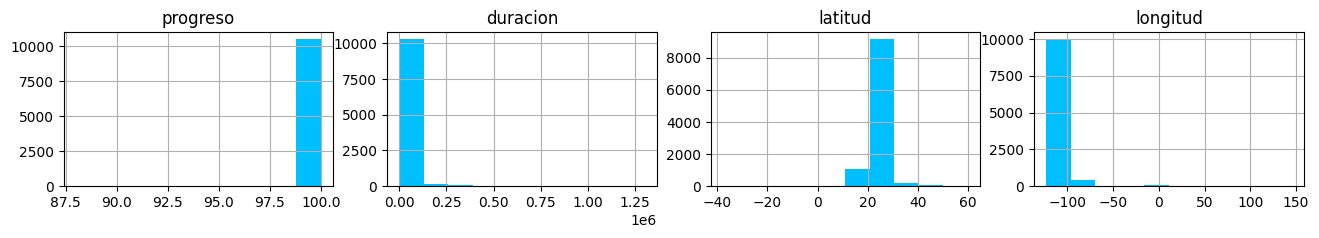

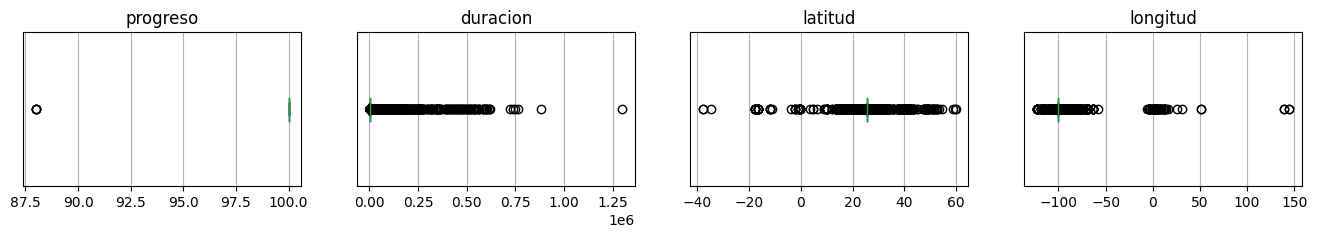

In [16]:
# Gráficos de barras
plt.subplots(1, 4, figsize=(16, 2))

for idx, i in enumerate(v_cuantitativas):
    plt.subplot(1, 4, idx+1)
    plt.hist(df_m[i], color='deepskyblue')
    plt.title(i)
    plt.grid(True)
    

# Gráficos de caja
plt.subplots(1, 4, figsize=(16.5, 2))

for idx, i in enumerate(v_cuantitativas):
    plt.subplot(1, 4, idx+1)
    pd.DataFrame(df_m[i]).boxplot(vert=False)
    
    plt.yticks([])
    plt.grid(True)
    plt.title(i)

#plt.tight_layout(pad = 0.5)
plt.show()

##### A) Variables cualitativas

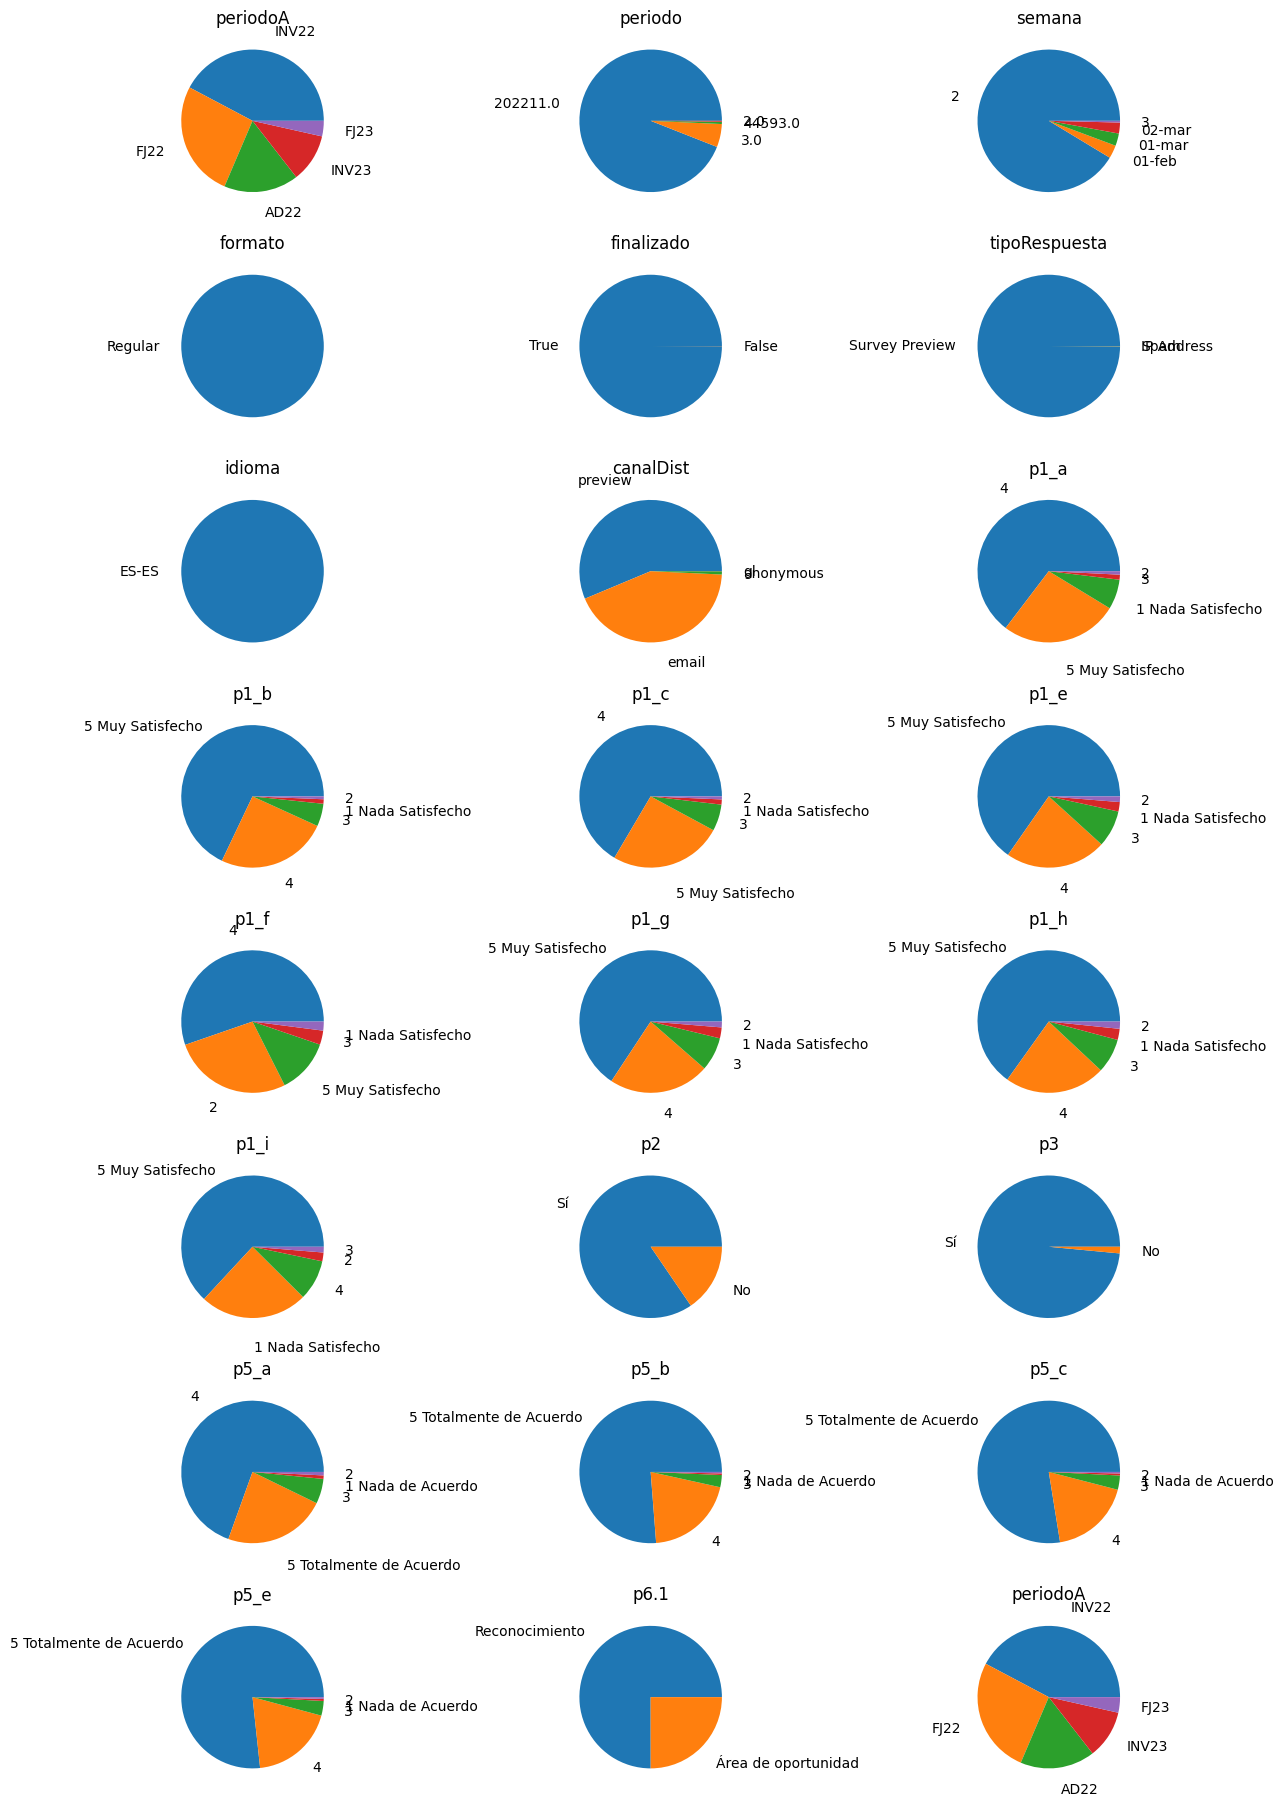

In [17]:
# Variables cualitativas con menos de 10 valores distintos
vc = []

for x in v_cualitativas:
    if (len(df_m[x].value_counts()) < 10):
        vc.append(x)
        

    
# Gráficos de pastel
plt.subplots(8, 3, figsize=(12, 18))

for idx, i in enumerate(vc):
            
    plt.subplot(8, 3, idx+1)
    plt.pie(df_m[i].dropna().value_counts(),
           labels=df_m[i].dropna().unique(),
           labeldistance=1.3)
    plt.title(i)

plt.subplot(8, 3, len(vc)+1)
plt.pie(df_m[vc[0]].dropna().value_counts(),
        labels=df_m[vc[0]].dropna().unique(),
        labeldistance=1.3)
plt.title(vc[0])
    
plt.tight_layout(pad = 0.5)
plt.show()

#### II.4.3 EDA Multivariado

##### A) Variables cuantitativas

In [18]:
df_m[v_cuantitativas].corr('pearson')\
.style.background_gradient(cmap='coolwarm',
                           axis=None).format(precision=2)

,progreso,duracion,latitud,longitud
progreso,1.00,0.00,nan,nan
duracion,0.00,1.00,-0.01,-0.01
latitud,nan,-0.01,1.00,0.10
longitud,nan,-0.01,0.10,1.00


### II.5 Verificación de calidad de los datos

#### II.5.1 Complitud

Obtener el porcentaje de valores nulos o faltantes por columna

In [19]:
pd.DataFrame(round(df_m.isnull().sum()/len(df_m)*100, 3))

,0
periodoA,0.000
osf,44.719
osf_Proyecto,59.625
nombreExp,82.932
crn,44.719
periodo,82.932
semana,83.056
formato,82.932
fechaInicio,0.000
progreso,0.000


#### II.5.2 Conformidad

Verificar si hay un mismo tipo de dato por columna

In [20]:
dict_c = {}

for col in df_m.columns:
    l = []
    for t in df_m[col].value_counts().index:
        l.append(type(t))

    dict_c[col] = set(l)

pd.DataFrame.from_dict(dict_c, orient='index').rename(columns={0:'Tipos de datos en columna'})

,Tipos de datos en columna
periodoA,<class 'str'>
osf,<class 'str'>
osf_Proyecto,<class 'str'>
nombreExp,<class 'str'>
crn,<class 'float'>
periodo,<class 'float'>
semana,<class 'str'>
formato,<class 'str'>
fechaInicio,<class 'str'>
progreso,<class 'int'>


#### II.5.3 Unicidad

Verificar si no hay registros repetidos

In [21]:
df_m[df_m.duplicated()]

,periodoA,osf,osf_Proyecto,nombreExp,crn,periodo,semana,formato,fechaInicio,progreso,...,p1_i,p2,p3,p4,p5_a,p5_b,p5_c,p5_e,p6,p6.1


## III. PREPARACIÓN DE LOS DATOS
---

**Preprocesamiento previo**

* Se eliminó el primer renglón en los cinco archivos para no tener el nombre de cada columna en inglés
* Se agregó a cada archivo una primera columna indicando el periodo académico al que pertenece
* Se unificaron los 5 archivos en uno solo, manteniendo todas las columnas de cada uno de ellos
* Se renombraron las columnas para tener títulos más cortos y representativos
* Se cambió el órden de las columnas para agruparlas por similitud


**Preprocesamiento siguiente**

1. Limpieza de datos:
* Eliminar columnas con un solo dato: idioma, tipo respuesta, finalizado
* Eliminar vaores nulos de columnas con más del 30% de valores nulos: nombreDest, mailDest, datRefExt

2. Transformación de datos:
* Eliminar columnas que no aportan información relevante
* Eliminar renglones que contengan solamente valores nulos en las columnas de la pregunta 1
* Transformar datos a valores numéricos enteros entre 1 y 5 en pregunta 1 y 53
* Transformar datos a valores booleanos en pregunta 24
* Convertir datos de texto de pregunta 6.1 a número binario
* Convertir variable de texto "periodoA" a variable entera
* Procesamiento de lenguaje natural (NLP) a preguntas 4 y 6
* Agregar columna evaluacion (variable objetivo)
* Balanceo de datos respecto a la variable objetivo
* Separar variables en 






* Transformar texto a números entre 1 y 5 en columnas de la pregunta 1 y 5
* Transformar texto a variable binaria(entera entre 0 y 1) en columnas de la pregunta 2 y 3
* Unir columnas osf y osf_proyecto
* Agregar columna nombreExp a osf
* Convertir datos de texto de pregunta 6.1 a número binario
* SMOTE (para aumentar la muestra de la clase minoritaria / Oversampling) y  CusterCentroids (Para reducir la muestra de la clase mayoritaria / Undersampling)
* Normalizar los datos
* Crear nueva columna `evaluacion`. Ésta será a variable objetivo y se obtendrá al calcular el promedio de los valores numéricos de cada columna

### III.1 Limpieza de datos

In [22]:
df_l = df_m.copy()

##### 1. Eliminar columnas con un solo dato

In [23]:
df_l.drop(['progreso', 'duracion', 'formato', 'idioma', 'p3'], axis=1, inplace=True)

##### 2. Eliminar variables con más de 80% valores nulos

In [24]:
df_l.drop(['nombreDest', 'mailDest', 'datRefExt'], axis=1, inplace=True)

### III.2 Transformación de datos

In [31]:
df_t = df_l.copy()

##### 1. Eliminar variables no relevantes

In [32]:
df_t.drop(['latitud', 'longitud', 'periodo', 'semana',
           'finalizado', 'tipoRespuesta', 'canalDist', 'crn',
           'fechaInicio', 'fechaFin', 'fechaRegistrada', 'id',
           'idRespuesta', 'ip', 'matricula', 'apellidoDest', 'p1_c', 'p1_f'], axis=1, inplace=True)

In [33]:
df_t.columns

Index(['periodoA', 'osf', 'osf_Proyecto', 'nombreExp', 'p1_a', 'p1_b', 'p1_e',
       'p1_g', 'p1_h', 'p1_i', 'p2', 'p4', 'p5_a', 'p5_b', 'p5_c', 'p5_e',
       'p6', 'p6.1'],
      dtype='object')

##### 2. Eliminar renglones con unicamente valores nulos

In [ ]:
df_t.dropna(subset=df_t.columns[1:9], inplace=True)

##### 3. Transformar datos a valores numéricos enteros entre 1 y 5 en pregunta 1 y 5

In [ ]:
# Transformación en pregunta 1
for col in df_t.columns[1:9]:
    df_t[col] = df_t[col].apply(lambda x: int(re.search(r'\d+', x).group()))

In [ ]:
# Transformación en pregunta 5
for col in df_t.columns[11:15]:
    df_t[col] = df_t[col].apply(lambda x: int(re.search(r'\d+', x).group()))

##### 4. Transformar datos a valores booleanos en pregunta 2

In [ ]:
def boolCol(dato):
    if dato == 'Sí':
        return bool(1)
    else:
        return bool(0)
    
df_t['p2'] = df_t['p2'].apply((boolCol))

#df_t.to_excel('DataTransf.xlsx', engine='xlsxwriter')

##### 5. Convertir datos de texto de pregunta 6.1 a número binario

* 0: Área de oportunuidad
* 1 : Reconocimiento

In [ ]:
def boolCol(dato):
    if dato == 'Reconocimiento':
        return bool(1)
    else:
        return bool(0)
    
df_t['p6.1'] = df_t['p6.1'].apply((boolCol))

##### 6. Convertir variable de texto "periodoA" a variable entera

Sustituir el valor de texto del periodo a un valor numérico:

* INV22: 0
* FJ22: 1
* AD22: 2
* INV23: 3
* FJ23: 4

In [ ]:
df_t.periodoA.unique()

array(['INV22', 'FJ22', 'AD22', 'INV23', 'FJ23'], dtype=object)

In [ ]:
for row in range(0, len(df_t)):
    if (df_t.iloc[row, 0] == 'INV22'):
        df_t.iloc[row, 0] = int(1)
    elif (df_t.iloc[row, 0] == 'FJ22'):
        df_t.iloc[row, 0] = int(2)
    elif (df_t.iloc[row, 0] == 'AD22'):
        df_t.iloc[row, 0] = int(3)
    elif (df_t.iloc[row, 0] == 'INV23'):
        df_t.iloc[row, 0] = int(4)
    elif (df_t.iloc[row, 0] == 'FJ23'):
        df_t.iloc[row, 0] = int(5)

df_t.periodoA = df_t.periodoA.apply(lambda x: int(x)) 

##### 7. Procesamiento de lenguaje natural (NLP) a preguntas 4 y 6

Para estas preguntas se realizará una tokenización del texto con base en un diccionario de palabras clave que nos darán un indicio acerca de si el comentario fue positivo o negativo

In [ ]:
df_nlp = df_t.copy()

**7.1 Limpieza del texto**

Eliminar carácteres especiales, signos de puntuación, artículos, nexos y preposiciones

In [ ]:
def cleanText(texto):
    # Convertir texto a string
    texto = str(texto)
    
    puntuacion = r'[,;.:¡!¿?@#$%&[\](){}<>~=+\-*/|\\_^`"\']'
    articulos = r'\b(el|la|los|las|un|una|unos|unas)\b'
    nexos = r'\b(y|e|ni|o|u|ya|pero|sino|que|mas|como|mas|por|eso|para)\b'
    preposiciones = r'\b(a|ante|bajo|cabe|con|contra|de|desde|durante|en|entre|hacia|hasta|mediante|para|por|segun|sin|so|sobre|tras|versus|via)\b'
    pronombres =  r'\b(yo|tu|el|ella|nosotros|ustedes|ellos|ellas|me|nos)\b'
    otros = r'\b(se|es|fue|lo|este|del|nan|mi|al|ninos|esta|su|sus|mis)\b'
    
    # signos de puntuación, articulos, nexos y preposiciones
    texto = re.sub(puntuacion, ' ', texto)
    texto = re.sub(articulos, ' ', texto)
    texto = re.sub(nexos, ' ', texto)
    texto = re.sub(preposiciones, ' ', texto)
    texto = re.sub(pronombres, ' ', texto)
    texto = re.sub(otros, ' ', texto)
    
    return texto

**7.2 Normalización del texto**

Llevar lo que puede ser expresado de múltiples maneras como fechas, números y abreviaturas a una única forma

In [ ]:
def normalizeText(texto):
    # Convertir texto a string
    texto = str(texto)
    
    # todo a minúsculas
    texto = texto.lower()

    # tildes y diacríticas
    texto = re.sub('á', 'a', texto)
    texto = re.sub('é', 'e', texto)
    texto = re.sub('í', 'i', texto)
    texto = re.sub('ó', 'o', texto)
    texto = re.sub('ú', 'u', texto)
    texto = re.sub('ü', 'u', texto)
    texto = re.sub('ñ', 'n', texto)

    return texto

**7.3 Tokenización**

Separar el texto en partes más pequeñas llamadas tókenes al identificar los espacios, signos de puntación y saltos de linea

In [ ]:
def tokenizeText(texto):
    return [token for token in texto.split()]

**7.4 Diccionario de palabras clave**

In [ ]:
# Aplicamos las tres etapas de preprocesamiento anterior
df_nlp.p4 = df_nlp.p4.apply(normalizeText)
df_nlp.p4 = df_nlp.p4.apply(cleanText)
df_nlp.p4 = df_nlp.p4.apply(tokenizeText)

df_nlp.p6 = df_nlp.p6.apply(normalizeText)
df_nlp.p6 = df_nlp.p6.apply(cleanText)
df_nlp.p6 = df_nlp.p6.apply(tokenizeText)

In [ ]:
# Lista de todas las palabras escritas
words = []

for row in range(1, len(df_nlp)):
    words += df_nlp.iloc[row, 10]  # Palabras de pregunta 4
    words += df_nlp.iloc[row, 15]  # Palabras de pregunta 6
    

In [ ]:
count = {}

# Iterar sobre cada palabra en la lista
for w in words:
    if w in count:
        count[w] += 1
    else:
        count[w] = 1

df_tokens = pd.DataFrame.from_dict(count, orient='index').rename(columns={0:'Repeticiones'}).sort_values(by='Repeticiones', ascending=False)

Ahora, con base en el rankeo de las palabras más repetidas, seleccionamos manualmente aquellas que tengan una conotación positiva `goodwords`

In [ ]:
goodwords = ['bueno', 'buena', 'bien', 'interesante', 'excelente', 'encanto', 'padre',
            'gracias', 'aprendi', 'bueno', 'gusto', 'gracias', 'ayudar', 'disfrute', 'aprendizaje',
            'enriquecedora', 'bonita', 'bonito', 'increible', 'feliz', 'enriquecedor', 'gratificante',
            'enseno']
#df_tokens[df_tokens['Repeticiones'] > 200].iloc[0:50]

**7.5 Numericalización**

Si el texto contiene alguna de las palabras contenidas en `goodwords`, cada aparición de una de esas palabras sumará 1 punto

In [ ]:
def numericalizeText(texto):
    suma = 0
    for w in goodwords:
        if (w in texto):
            suma += 1
    return suma

In [ ]:
# Aplicamos numericalizacion
df_nlp.p4 = df_nlp.p4.apply(numericalizeText)
df_nlp.p6 = df_nlp.p6.apply(numericalizeText)

In [ ]:
df_nlp.p4.value_counts()

p4
0    4594
1    4329
2    1223
3     298
4      44
5       7
6       2
Name: count, dtype: int64

In [ ]:
df_nlp.head()

,periodoA,p1_a,p1_b,p1_c,p1_e,p1_f,p1_g,p1_h,p1_i,p2,p4,p5_a,p5_b,p5_c,p5_e,p6,p6.1
1,1,4,5,4,5,4,5,5,5,True,1,4,5,5,5,1,True
2,1,4,4,4,4,2,4,4,1,True,1,4,4,4,4,0,True
3,1,4,5,5,5,5,5,5,4,True,2,5,5,5,5,0,False
4,1,5,5,5,3,3,5,5,5,True,2,5,5,5,5,1,True
5,1,4,3,3,3,4,5,5,2,True,2,4,4,4,4,0,False


##### 8. Agregar columna evaluacion (v. objetivo)

Esta columna se calculará como el promedio de las preguntas

In [ ]:
df_nlp.insert(17, 'evaluacion', 0)

for r in range(0,len(df_nlp)):
    df_nlp.iloc[r, 17] = round((df_nlp.iloc[r, 1:9].sum() +
                              5*df_nlp.iloc[r, 9] +
                              df_nlp.iloc[r, 10] +
                              df_nlp.iloc[r, 11:15].sum() +
                              df_nlp.iloc[r, 15] +
                              5*df_nlp.iloc[r, 16])/16)

In [ ]:
df_nlp.head(3)

,periodoA,p1_a,p1_b,p1_c,p1_e,p1_f,p1_g,p1_h,p1_i,p2,p4,p5_a,p5_b,p5_c,p5_e,p6,p6.1,evaluacion
1,1,4,5,4,5,4,5,5,5,True,1,4,5,5,5,1,True,4
2,1,4,4,4,4,2,4,4,1,True,1,4,4,4,4,0,True,3
3,1,4,5,5,5,5,5,5,4,True,2,5,5,5,5,0,False,4


##### 9. Balanceo de datos

* Se observó que la mayoría de los valores de la columna evaluación corresponde al valor 5 (moda), por lo que los datos están fuertemente desbalanceados 

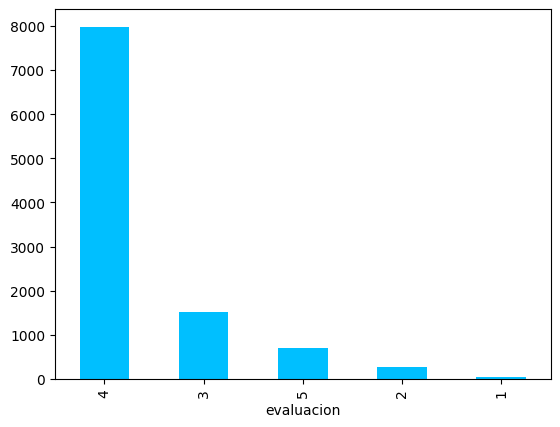

In [ ]:
df_nlp.evaluacion.value_counts().plot.bar(color='deepskyblue');

In [ ]:
median = int(df_nlp.evaluacion.value_counts().median())
median
# 125 corresponde al valor 3

710

**Observaciones**

Claramente podemos observar que los datos están desbalanceados respecto a la variable objetivo. Por ello vamos a realizar técnicas de oversampling, para aumentar la cantidad de muestras con menor presencia (1 y 2); y undersampling, para disminuir la cantidad de muestras con mayor presencia (3 y 4). Se tomará como referencia al valor de la clasificación 5, el cual corresponde a la mediana.

In [ ]:
X = df_nlp.drop('evaluacion', axis=1)
y = df_nlp.evaluacion

In [ ]:
# Oversampling with SMOTE
samples = {1: median,
          2: median,
          3: 1506,
          4: 7984,
          5: median}

sm = SMOTE(sampling_strategy=samples, random_state=42)
X_over, y_over = sm.fit_resample(X, y)


In [ ]:
warnings.filterwarnings("ignore")

# Undersampling with ClusterCentroids
samples = {1: median,
          2: median,
          3: median,
          4: median,
          5: median}

cc = ClusterCentroids(sampling_strategy=samples, 
                      voting='soft',
                      estimator=None,
                      random_state=42)
X_under, y_under = cc.fit_resample(X_over, y_over)


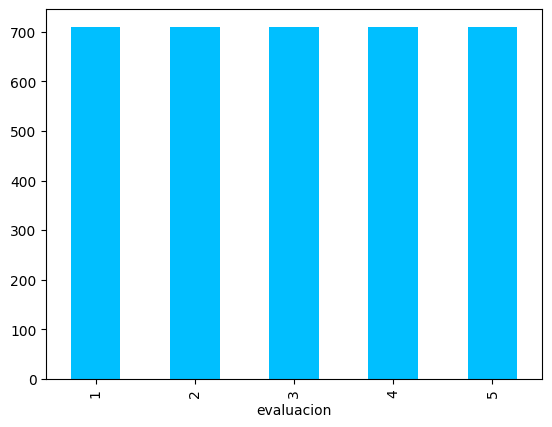

In [ ]:
df_resampled = X_under.copy()
df_resampled['evaluacion'] = y_under.copy()
df_resampled.evaluacion.value_counts().plot.bar(color='deepskyblue');

##### 10. Separar variables en dependiente e independiente

In [ ]:
# Variables dependientes e independiente
X = X_under.copy()
y = y_under.copy()

##### 11. Separar variables en conjunto de entrenamiento y de prueba

In [ ]:
# Separar variables en conjunto entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##### 12. Escalar variabes (Min-Max scaler)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train = scaler.transform(X_train)  # Scaling the training set features
X_test = scaler.transform(X_test)  # Scaling the testing set features

## IV. MODELACIÓN
---

En esta sección se seguirán las siguientes dos etapas


**A) Modelo de clasificación de nivel de satisfacción**
Se elegirá el mejor de los siguientes modelos de clasificación de aprendizaje supervisado:
* Regresión logística
* Random forest
* K-NN
* SVM
* XGBoost

**B) Generación de nueva información a partir de los datos**
Se utilzarán modelos de aprendizaje no supervisado para las siguientes tareas:

* Identificar las variables más relevantes: Análisis de componentes principales (PCA)
* Identificar si los mejors osf tienen algo en común (K-Means y Clusterización)

**Descripción del set de datos (ABT)**

In [ ]:
df_resampled.describe()

,periodoA,p1_a,p1_b,p1_c,p1_e,p1_f,p1_g,p1_h,p1_i,p4,p5_a,p5_b,p5_c,p5_e,p6,evaluacion
count,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000,3550.00000,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000
mean,2.058310,3.205634,3.301127,3.292113,3.134648,3.135211,3.089577,3.022254,3.17493,0.610141,3.464507,3.652676,3.680282,3.618310,0.609014,3.000000
std,1.148207,1.489315,1.497165,1.478891,1.535312,1.465399,1.550095,1.584231,1.49295,0.931650,1.442329,1.414886,1.423757,1.451169,0.894760,1.414413
min,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.00000,0.000000,3.000000,3.000000,3.000000,3.000000,0.000000,2.000000
50%,2.000000,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.00000,0.000000,4.000000,4.000000,4.000000,4.000000,0.000000,3.000000
75%,3.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.00000,1.000000,5.000000,5.000000,5.000000,5.000000,1.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


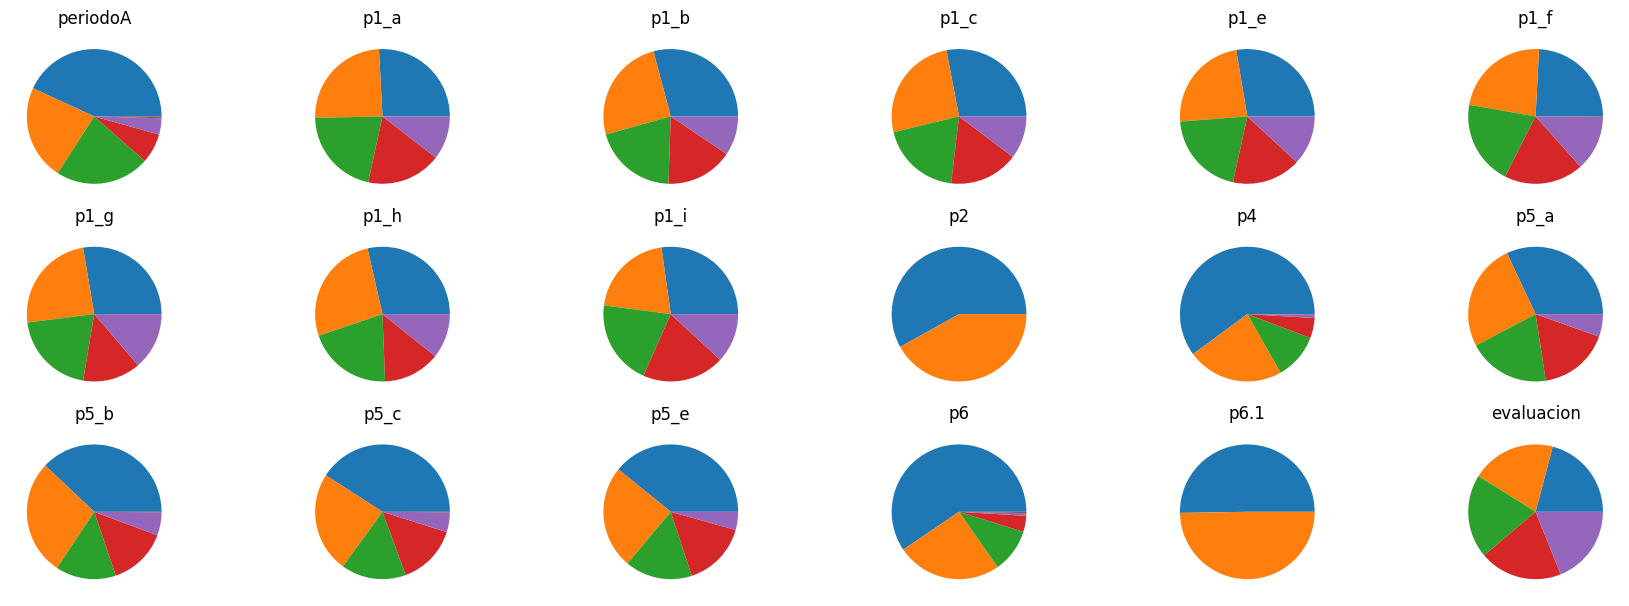

In [ ]:
# 15 variables

# Gráficos de pastel
plt.subplots(3,  6, figsize=(18, 6))

for idx, i in enumerate(pd.DataFrame(X_train).columns):
            
    plt.subplot(3, 6, idx+1)
    plt.pie(pd.DataFrame(X_train)[i].value_counts(),
           labels=None)
    
    plt.title(df_resampled.columns[i])


plt.subplot(3, 6, 18)
plt.pie(pd.DataFrame(y_train).value_counts(),
       labels=None)

plt.title('evaluacion')
    
plt.tight_layout(pad = 0.5)
plt.show()

In [ ]:
df_resampled.corr('pearson')\
.style.background_gradient(cmap='coolwarm',
                           axis=None).format(precision=2)

,periodoA,p1_a,p1_b,p1_c,p1_e,p1_f,p1_g,p1_h,p1_i,p2,p4,p5_a,p5_b,p5_c,p5_e,p6,p6.1,evaluacion
periodoA,1.00,-0.00,-0.03,0.00,0.01,-0.03,0.01,0.04,-0.01,-0.07,0.02,-0.07,-0.06,-0.08,-0.07,0.02,-0.04,-0.02
p1_a,-0.00,1.00,0.89,0.87,0.85,0.74,0.89,0.85,0.81,0.60,0.55,0.74,0.77,0.74,0.77,0.52,0.58,0.90
p1_b,-0.03,0.89,1.00,0.87,0.84,0.76,0.85,0.81,0.80,0.58,0.53,0.78,0.81,0.78,0.80,0.50,0.54,0.88
p1_c,0.00,0.87,0.87,1.00,0.83,0.71,0.83,0.80,0.78,0.57,0.52,0.74,0.79,0.75,0.78,0.50,0.52,0.87
p1_e,0.01,0.85,0.84,0.83,1.00,0.71,0.85,0.82,0.77,0.56,0.54,0.71,0.74,0.71,0.73,0.50,0.56,0.87
p1_f,-0.03,0.74,0.76,0.71,0.71,1.00,0.71,0.69,0.75,0.47,0.51,0.67,0.68,0.67,0.67,0.47,0.47,0.78
p1_g,0.01,0.89,0.85,0.83,0.85,0.71,1.00,0.91,0.82,0.64,0.55,0.70,0.73,0.70,0.73,0.51,0.61,0.89
p1_h,0.04,0.85,0.81,0.80,0.82,0.69,0.91,1.00,0.81,0.62,0.57,0.67,0.71,0.67,0.69,0.52,0.58,0.88
p1_i,-0.01,0.81,0.80,0.78,0.77,0.75,0.82,0.81,1.00,0.56,0.53,0.68,0.71,0.67,0.70,0.49,0.53,0.84
p2,-0.07,0.60,0.58,0.57,0.56,0.47,0.64,0.62,0.56,1.00,0.40,0.50,0.50,0.48,0.52,0.37,0.69,0.71


**Observaciones**

Podemos detectar que hay multicolinealidad entre las variables y además la gran mayoría se encuentra fuertemente correlacionada con la variable objetivo.

#### Valores que puede tomar cada variable

Valores antes de aplicar Min-Max scaler y la separación en conjuntos de variable independiente, dependiente, entrenamiento y prueba.

In [ ]:
for col in df_resampled.columns:
    print(f'{col}: {df_resampled[col].unique()}. - {df_resampled[col].dtype}')

periodoA: [2 1 3 5 4 0]. - int64
p1_a: [1 0 2 3 4 5]. - int64
p1_b: [1 2 3 4 5]. - int64
p1_c: [1 0 2 3 4 5]. - int64
p1_e: [1 2 3 4 5]. - int64
p1_f: [2 3 1 5 4 0]. - int64
p1_g: [2 1 3 4 5]. - int64
p1_h: [1 0 2 3 4 5]. - int64
p1_i: [1 2 4 3 0 5]. - int64
p2: [False  True]. - bool
p4: [0 1 2 3 4 5 6]. - int64
p5_a: [1 3 0 2 4 5]. - int64
p5_b: [2 3 1 0 4 5]. - int64
p5_c: [2 3 1 0 4 5]. - int64
p5_e: [1 3 2 0 4 5]. - int64
p6: [0 2 3 1 4 5]. - int64
p6.1: [ True False]. - bool
evaluacion: [1 2 3 4 5]. - int64


### IV.1 Modelos de clasificación

Se elegirá el mejor de los siguientes modelos de clasificación de aprendizaje supervisado:
* Regresión logística
* Random forest
* K-NN
* Support Vector Machine
* Red Neuronal Multicapa

#### IV.1.1 Regresión Logística
---

In [ ]:
penalties = ['l1', 'l2', 'elasticnet']

# Solvers que soportan casos multinomiales
dict_r2_lr = {'lbfgs': {},
             'newton-cg': {},
             'sag': {},
             'saga': {}}

for solv in dict_r2_lr.keys():
    for pen in penalties:
        try:
            m_lr = LogisticRegressionCV(cv=8,
                                        solver=solv,
                                        penalty=pen,
                                        multi_class='multinomial',
                                        max_iter = 5000,
                                        random_state=42)
      
            m_lr.fit(X_train, y_train)

            dict_r2_lr[solv][pen] = round(m_lr.score(X_test, y_test), 2)
        except:
            dict_r2_lr[solv][pen] = 'NA'
  
  

In [ ]:
print('Accuracy por `solver` y `penalty`')
pd.DataFrame(dict_r2_lr)

Accuracy por `solver` y `penalty`


,lbfgs,newton-cg,sag,saga
l1,NA,NA,NA,0.92
l2,0.92,0.92,0.92,0.92
elasticnet,NA,NA,NA,NA


**MEJOR MODELO DE REGRESIÓN LOGÍSTICA**

In [ ]:
m_lr = LogisticRegressionCV(cv=8,
                            solver='saga',
                            penalty='l1',
                            multi_class='multinomial',
                            max_iter = 5000,
                            random_state=42)

# Entrenamiento
m_lr.fit(X_train, y_train)

# Evaluación
y_pred_lr = m_lr.predict(X_test)

acc_lr = round(accuracy_score(y_test, y_pred_lr), 2)
f1_lr = round(f1_score(y_test, y_pred_lr, average='macro'), 2)
auc_lr = round(roc_auc_score(y_test,
                             m_lr.predict_proba(X_test),
                             multi_class='ovo'), 2)

print('* Mean accuracy:', acc_lr)
print('* F1 score:', f1_lr)
print('* AUC score:', auc_lr)

* Mean accuracy: 0.92
* F1 score: 0.92
* AUC score: 0.99


#### IV.1.2 Random Forest
---

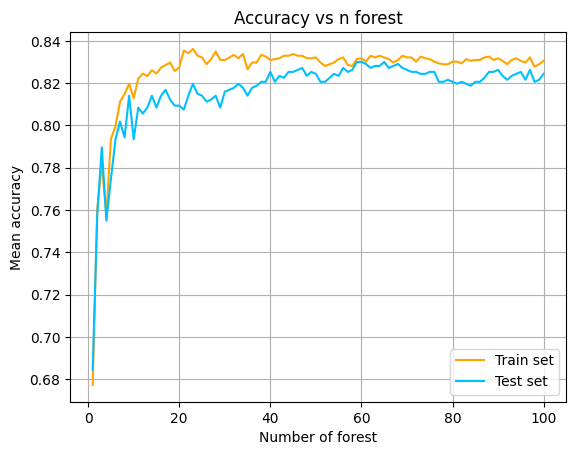

In [ ]:
acc_train = []  # Lista para almacenar accuracy 
acc_test = []  # Lista para almacenar accuracy 

n = 100  # Número de bosques (forest)

for k in range(1, n+1):
    
    m_rfc = RandomForestClassifier(n_estimators=k,
                                 criterion='entropy',
                                 max_depth=3,
                                 random_state=42)

    m_rfc.fit(X_train, y_train)


    acc_train.append(m_rfc.score(X_train, y_train))
    acc_test.append(m_rfc.score(X_test, y_test))

plt.plot(range(1, n+1), acc_train, color='orange')
plt.plot(range(1, n+1), acc_test, color='deepskyblue')
plt.xlabel('Number of forest')
plt.ylabel('Mean accuracy')
plt.title('Accuracy vs n forest')
plt.grid(True)
plt.legend(['Train set', 'Test set'])
plt.show()

**MEJOR MODELO DE RANDOM FOREST**

In [ ]:
m_rfc = RandomForestClassifier(n_estimators=60,
                               criterion='entropy',
                               max_depth=3,
                               random_state=42)

m_rfc.fit(X_train, y_train)

# Entrenamiento
m_rfc.fit(X_train, y_train)

# Evaluación
y_pred_rfc = m_rfc.predict(X_test)
acc_rfc =  round(accuracy_score(y_test, y_pred_rfc), 2)
f1_rfc = round(f1_score(y_test, y_pred_rfc, average='macro'), 2)
auc_rfc = round(roc_auc_score(y_test,
                              m_rfc.predict_proba(X_test),
                              multi_class='ovo'), 2)

print('* Mean accuracy:', acc_rfc)
print('* F1 score:', f1_rfc)
print('* AUC score:', auc_rfc)

* Mean accuracy: 0.83
* F1 score: 0.82
* AUC score: 0.97


#### IV.1.3 K-Nearest Neighbors
---

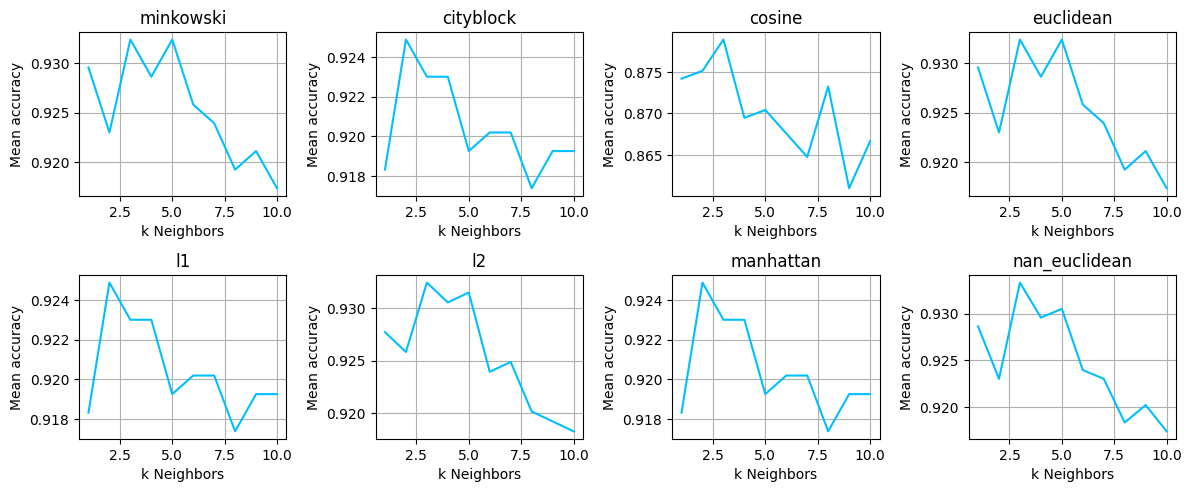

In [ ]:
metrics = ['minkowski', 'cityblock', 'cosine', 'euclidean',
           'l1', 'l2', 'manhattan', 'nan_euclidean']
n = 10

plt.subplots(2, 4, figsize=(12, 5))

for idx,metric_ in enumerate(metrics):
    acc = []
    for k in range(1, n+1):
        m_knnC = KNeighborsClassifier(n_neighbors=k,
                                      metric=metric_)

        # Training
        m_knnC.fit(X_train, y_train)

        acc.append(m_knnC.score(X_test, y_test))

    plt.subplot(2, 4, idx+1)
    plt.plot(range(1, n+1), acc, color='deepskyblue')
    plt.xlabel('k Neighbors')
    plt.ylabel('Mean accuracy')
    plt.title(metric_)
    plt.grid(True)

plt.tight_layout(pad=1)
plt.show()

**MEJOR MODELO DE K-NN**

In [ ]:
m_knnC = KNeighborsClassifier(n_neighbors=3,
                              metric='l2')

# Entrenamiento
m_knnC.fit(X_train, y_train)

# Evaluación
y_pred_knnC = m_knnC.predict(X_test)

acc_knnC = round(accuracy_score(y_test, y_pred_knnC), 2)
f1_knnC = round(f1_score(y_test, y_pred_knnC, average='macro'), 2)
auc_knnC = round(roc_auc_score(y_test,
                               m_knnC.predict_proba(X_test),
                               multi_class='ovo'), 2)


print('* Mean accuracy:', acc_knnC)
print('* F1 score:', f1_knnC)
print('* AUC score:', auc_knnC)

* Mean accuracy: 0.93
* F1 score: 0.93
* AUC score: 0.98


#### IV.1.4 Support Vector Machine (SVM)
---

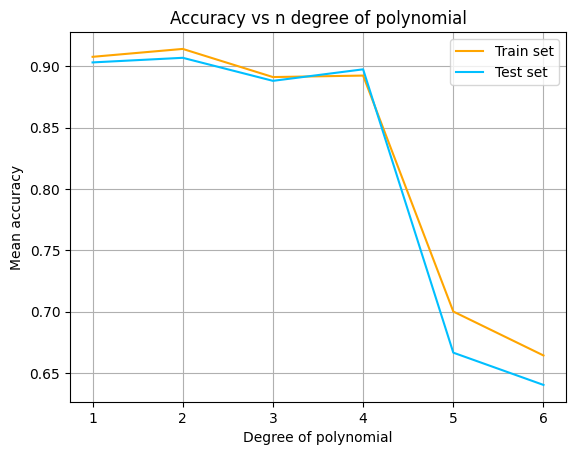

In [ ]:
acc_train = []  # Lista para almacenar accuracy 
acc_test = []  # Lista para almacenar accuracy 

n = 6  # Grados del polinomio

for k in range(1, n+1):
    
    m_svm = SVC(kernel='poly',
            degree=k,
            gamma='auto',
            decision_function_shape='ovo',
            probability=True,
            random_state=42)

    m_svm.fit(X_train, y_train)


    acc_train.append(m_svm.score(X_train, y_train))
    acc_test.append(m_svm.score(X_test, y_test))

plt.plot(range(1, n+1), acc_train, color='orange')
plt.plot(range(1, n+1), acc_test, color='deepskyblue')
plt.xlabel('Degree of polynomial')
plt.ylabel('Mean accuracy')
plt.title('Accuracy vs n degree of polynomial')
plt.grid(True)
plt.legend(['Train set', 'Test set'])
plt.show()

El modelo logró generalizar muy en un polinomio de grado 4, ya que el accuracy del conjunto de prueba superó al de entrenamiento.

**MEJOR MODELO DE SVM**

In [ ]:
m_svm = SVC(kernel='poly',
            degree=4,
            gamma='auto',
            probability=True,
            random_state=42)

# Entrenamiento
m_svm.fit(X_train, y_train)

# Evaluación
y_pred_svm = m_svm.predict(X_test)

acc_svm = round(accuracy_score(y_test, y_pred_svm), 2)
f1_svm = round(f1_score(y_test, y_pred_svm, average='macro'), 2)
auc_svm = round(roc_auc_score(y_test,
                               m_svm.predict_proba(X_test),
                               multi_class='ovo'), 2)


print('* Mean accuracy:', acc_svm)
print('* F1 score:', f1_svm)
print('* AUC score:', auc_svm)

* Mean accuracy: 0.9
* F1 score: 0.89
* AUC score: 0.98


#### IV.1.5 Red Neuronal Multicapa
---

### IV.2 Modelos de aprendizaje no supervisado para generar nueva información

Se utilzarán modelos de aprendizaje no supervisado para las siguientes tareas:

* Identificar las variables más relevantes: Análisis de componentes principales (PCA)
* Identificar si los mejors osf tienen algo en común: K-Means y Clusterización

Uniendo datos escalados para alimentar a modelos de aprendizaje no supervisado

In [ ]:
Xc = X.copy()
Xc['evaluacion'] = y
Xc.head(3)

,periodoA,p1_a,p1_b,p1_c,p1_e,p1_f,p1_g,p1_h,p1_i,p2,p4,p5_a,p5_b,p5_c,p5_e,p6,p6.1,evaluacion
0,2,1,1,1,1,2,2,1,1,False,0,1,2,2,1,0,True,1
1,2,1,1,1,1,2,2,1,1,False,0,1,2,3,1,0,False,1
2,1,1,1,1,1,2,1,1,2,False,0,3,3,3,3,0,False,1


#### IV.2.1 Análisis de Componentes Principales (PCA)

In [ ]:
c = 5  # Number of components to test
pca = PCA(n_components = c)
pca.fit(X)

PCA(n_components=5)

In [ ]:
#  Percentage of variance (~information) stored per component 
pca.explained_variance_ratio_

array([0.72783997, 0.06488371, 0.04171983, 0.02833372, 0.02147532])

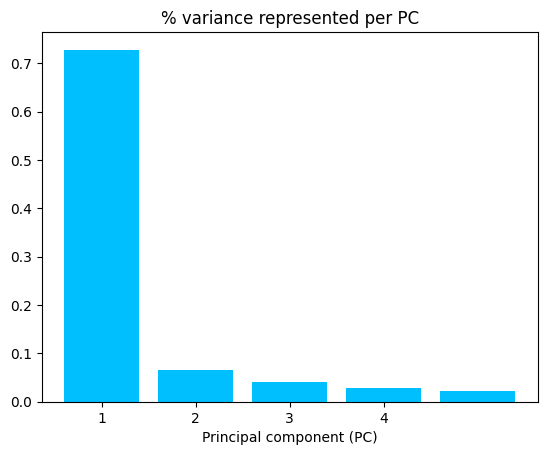

In [ ]:
# Visualization
plt.bar(np.array(range(c))+1, pca.explained_variance_ratio_, color='deepskyblue')
plt.title("% variance represented per PC")
plt.xlabel("Principal component (PC)")
plt.xticks(range(1,c))
plt.show()

In [ ]:
pca.explained_variance_ratio_[:1].sum()

0.7278399703048261

Hay una componente que representa casi completamente (72%) a todo los datos

##### Identificar las variables mas relevantes

In [ ]:
# Data frame of first principal component eigenvalues
df_pc1_cmpnts = pd.DataFrame(np.abs(pca.components_[0]),
                             index=X.columns)  

df_pc1_cmpnts.sort_values(by=0, ascending=False).head(10)

,0
p1_g,0.304277
p1_h,0.303017
p1_b,0.299841
p1_a,0.297405
p1_e,0.295544
p1_c,0.289104
p1_i,0.279229
p5_e,0.274512
p5_b,0.270148
p5_a,0.266441


En la componente más importante las variables son casi igual de importantes, ninguna tiene más relevancia que el resto

#### IV.2.2 K Means

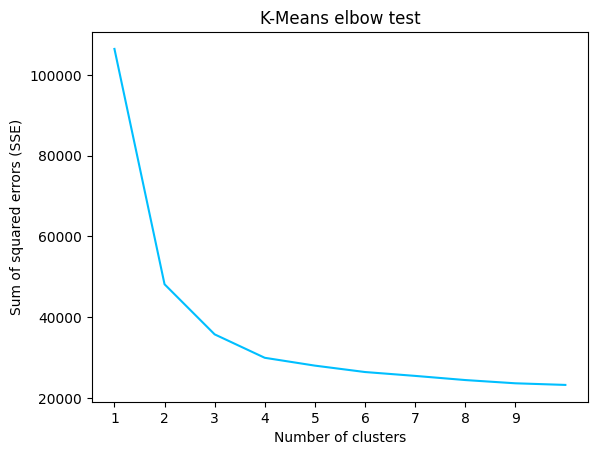

In [ ]:
sse = []  # Lista de sum of squared errors 
n = 10  # Número de clusters a ser probados para elegir el mejor

for i in range(n):
    kmeans= KMeans(init='random',
                   n_init=5,
                   n_clusters=i+1,
                   random_state=42)
    
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.plot(np.array(range(n))+1,sse, color='deepskyblue');
plt.xticks(range(1,n))
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared errors (SSE)')
plt.title ('K-Means elbow test')
plt.show()

De acuerdo con la técnica del codo, la mejor elección es generar **3 clusters**

#### IV.2.3 Clusterización

---
## TESTS

In [ ]:
#df_t.to_excel('DataTransf.xlsx', engine='xlsxwriter')